# Yelp Data Analysis

### By- Chouthai, Rohan; Rajnalwar, Chandrakiran

#### Loading the libraries

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import StratifiedKFold
from sklearn.cross_validation import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

# Set some Pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)

In [2]:
import os

os.chdir('C:\\Users\\rohan\\project')

#### Loading the data

In [3]:
yelp_business=pd.read_csv('yelp_business.csv',sep=',')
yelp_business.head()


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [4]:
yelp_business_attributes=pd.read_csv('yelp_business_attributes.csv',sep=',')
yelp_business_attributes.head()

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,...,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [5]:
yelp_user=pd.read_csv('yelp_user.csv',sep=',')
yelp_user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,2.00,0,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,3.45,0,0,0,0,0,0,0,0,0,1,0


In [6]:
yelp_review=pd.read_csv('yelp_review.csv',sep=',')
yelp_review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [7]:
yelp_checkin=pd.read_csv('yelp_checkin.csv',sep=',')
yelp_checkin.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [91]:
yelp_tip=pd.read_csv('yelp_tip.csv',sep=',')
yelp_tip.head()

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


## Yelp Businesses Analysis

### Exploratory Data Analysis

In [43]:
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [44]:
yelp_business.isnull().sum()

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

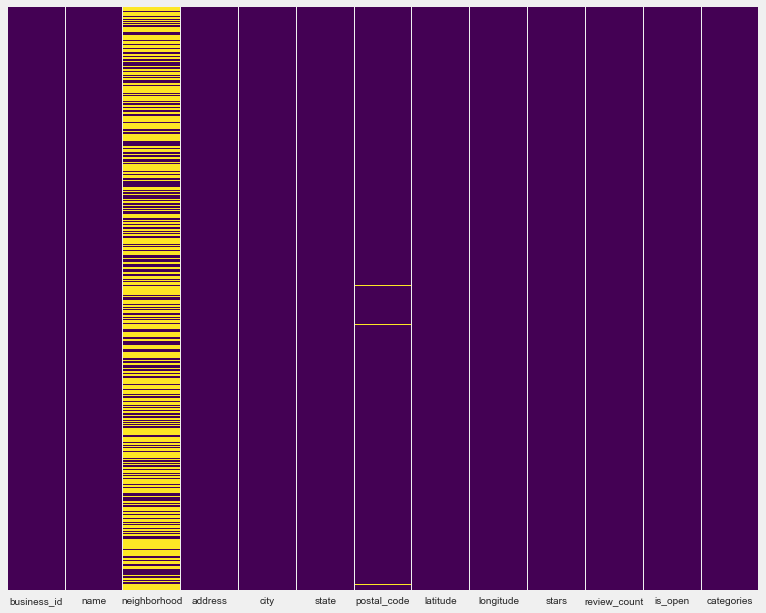

In [45]:
plt.figure(figsize=(12,10))
f = sns.heatmap(yelp_business.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

#### Star Rating Distribution

In [46]:
yelp_business['stars'].nunique()

9

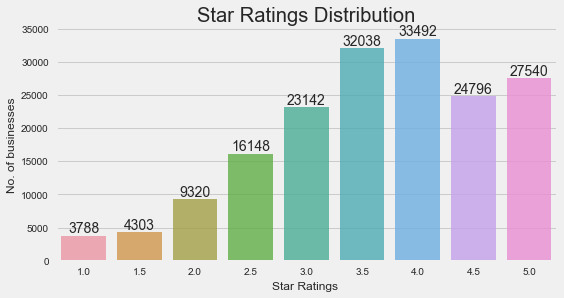

In [47]:
x=yelp_business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Ratings Distribution")
plt.ylabel('No. of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#### City wide reviews

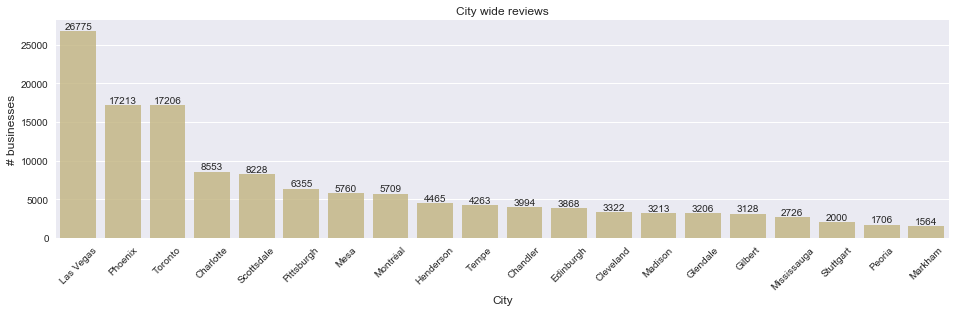

In [8]:
color = sns.color_palette()
x=yelp_business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[4])
plt.title("City wide reviews")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)


rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


In [48]:
B = yelp_business['stars']>=4
yelp_stars = yelp_business[B]
by_city = yelp_stars.groupby('city')




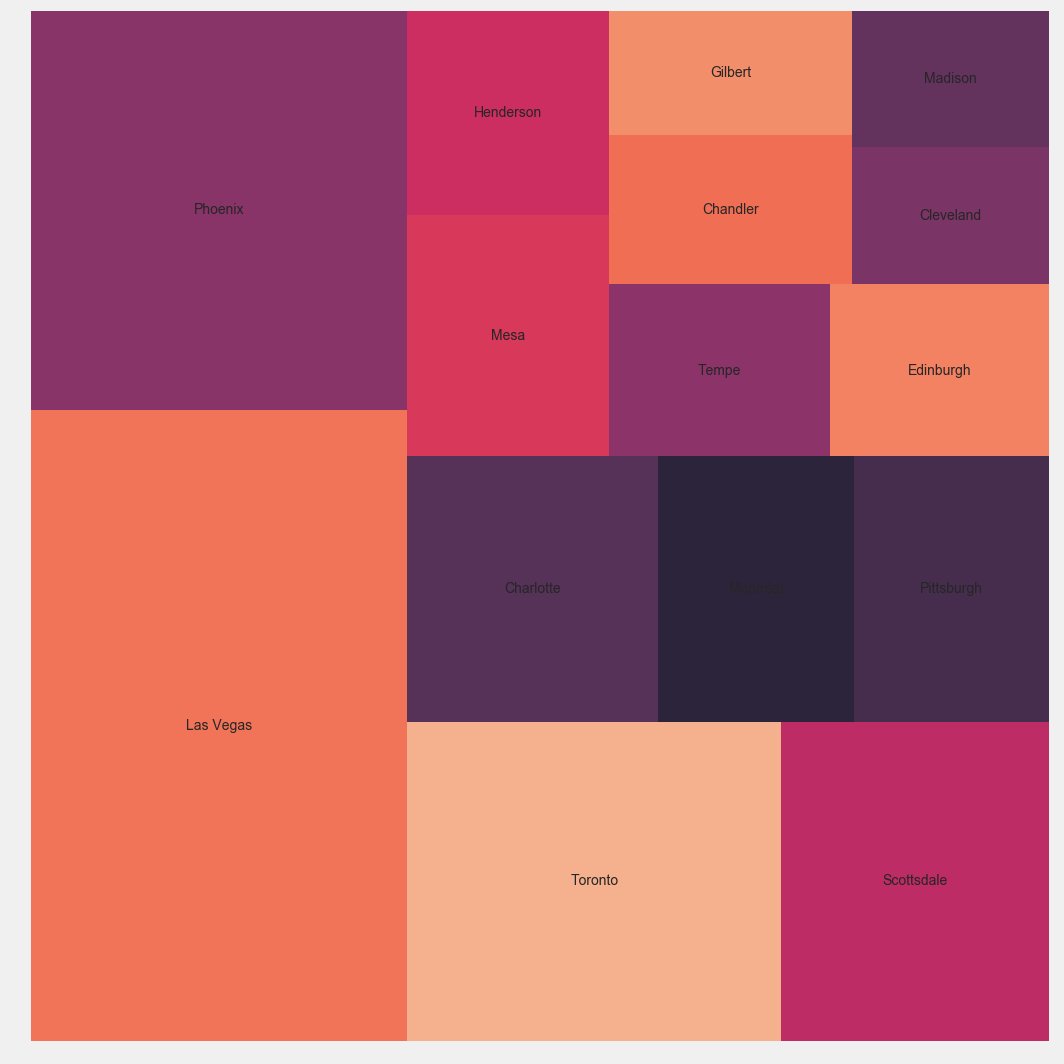

In [50]:
import squarify
plt.figure(figsize=(15,15))

a = by_city['business_id'].count()
a.sort_values(ascending=False,inplace=True)

squarify.plot(sizes= a[0:15].values, label= a[0:15].index, alpha=0.9)

plt.axis('off')
plt.tight_layout()

### What happens in Vegas, stays in Vegas !!

In [9]:
LasVegas_restaurents=yelp_business.loc[(yelp_business['city'] =='Las Vegas')]
LasVegas_restaurents.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping;Sporting Goods
26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,4.5,23,1,Shopping;Jewelry;Watch Repair;Local Services
41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,4.5,20,1,Home Services;Lighting Fixtures & Equipment;Lo...
48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,3.5,25,1,Nurseries & Gardening;Home & Garden;Shopping


In [10]:
LasVegas_restaurents.shape

(26775, 13)

#### Quality of Las Vegas businesses

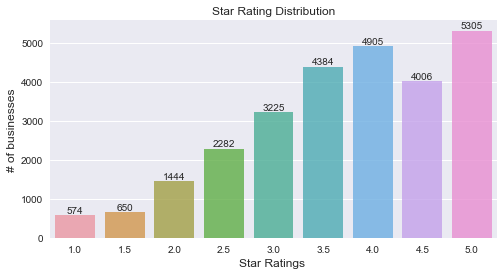

In [11]:
#Get the distribution of the ratings
x=LasVegas_restaurents['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#### Top categories of Las Vegas businesses

There are  17151  different types/categories of Businesses in Las Vegas in Yelp!


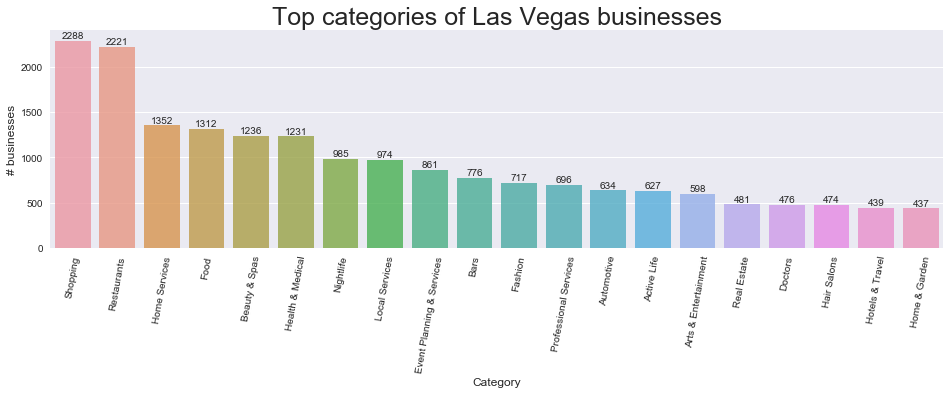

In [13]:
business_cats=' '.join(LasVegas_restaurents['categories'])

cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Las Vegas in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[2])
plt.title("Top categories of Las Vegas businesses",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

## Check-in Analysis

In [14]:
yelp_checkin.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [17]:
#checkins exploration
df=yelp_checkin.groupby(['weekday','hour'])['checkins'].sum()
df=df.reset_index()
df=df.pivot(index='hour',columns='weekday')[['checkins']]
df.columns = df.columns.droplevel()
df=df.reset_index()
df.head()


weekday,hour,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0:00,178666,163336,224425,225209,171669,156195,166254
1,10:00,11837,10432,16753,15903,9776,9448,9200
2,11:00,15617,14580,15833,13724,14791,14397,14568
3,12:00,26149,23655,21330,16856,24631,24994,24828
4,13:00,37355,33640,36613,28085,34514,35002,34519


In [19]:
# Workaround for not being able to sort the values by hour
df.hour=df.hour.apply(lambda x: str(x).split(':')[0])
df.hour=df.hour.astype(int)
# Sort the hour column 
df=df.sort_values('hour')
df=df[['hour','Mon', 'Tue','Wed','Thu','Fri','Sat', 'Sun' ]]
# df=df.set_index('hour')
cm = sns.light_palette("orange", as_cmap=True)
df.head()

weekday,hour,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0,163336,156195,166254,171669,178666,224425,225209
11,1,161168,162632,174696,181712,190371,245453,235295
16,2,140252,141732,153923,160906,169989,236195,224716
17,3,106422,103584,111840,117639,127783,189242,184979
18,4,73497,68950,72821,76283,86825,138952,140092


### Checkin variations through the day

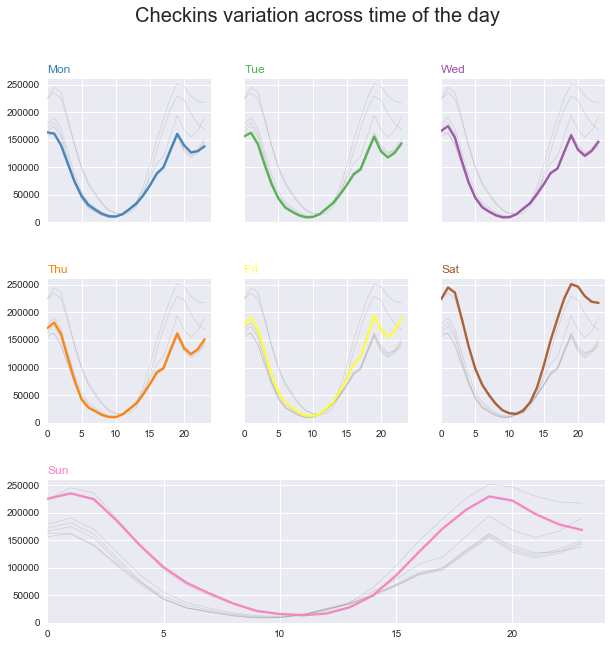

In [20]:
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')
plt.figure(figsize=(10,10))
plt.suptitle("Checkins variation across time of the day",fontsize=20)
gridspec.GridSpec(3,3)
plt.subplots_adjust(hspace=0.4)

# multiple line plot
num=0
for column in df.drop('hour', axis=1):
    num+=1
    # Find the right spot on the plot
    
    if num==7:  # adjustment to fit sunday
        plt.subplot2grid((3,3),(2,0),colspan=3)
    else:
        plt.subplot(3,3, num)
    
    # plot every groups, but discreet
    for v in df.drop('hour', axis=1):
        plt.plot(df['hour'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    # Plot the lineplot
    plt.plot(df['hour'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    # Same limits for everybody!
    plt.xlim(0,24)
    plt.ylim(-2,260000)
    # Not ticks everywhere
    if num in range(4) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

#### Checkins through the week

In [21]:
Checkin_analysis=df[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]

7 1925357 3291582


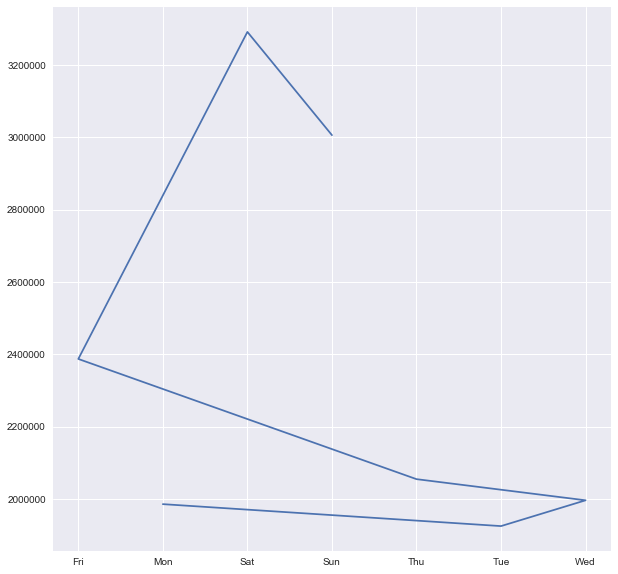

In [22]:
total_checkins = np.sum(Checkin_analysis, axis=0)  
                                       
print(len(total_checkins), min(total_checkins), max(total_checkins))
plt.figure(figsize=(10,10))
plt.plot(total_checkins)

### Kernel Density Estimator for the checkins

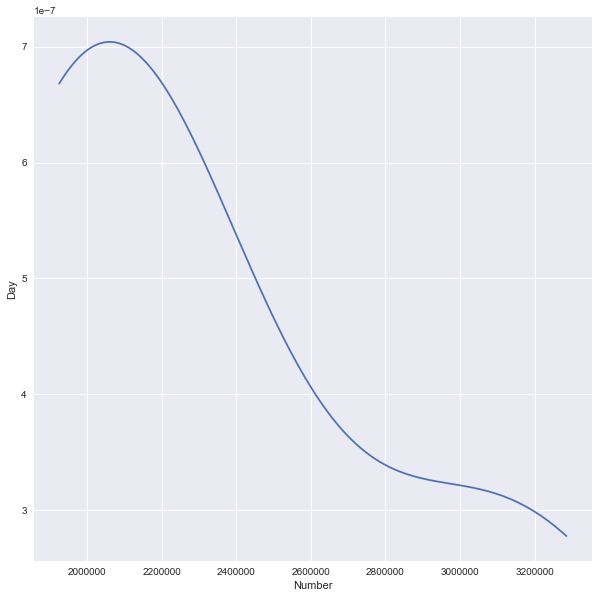

Count statistics:
  min:  1925357
  mean: 2378336.8571428573
  max:  3291582


In [23]:
from scipy import stats

# Use Gaussian smoothing to estimate the density
density = stats.kde.gaussian_kde(total_checkins)

# Make an x-axis for which to estimate the density, for plotting
x = np.arange(min(total_checkins), max(total_checkins), 10000)

# Draw the density plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, density(x))
ax.set_xlabel("Number")
ax.set_ylabel("Day")

plt.show()

print(f'Count statistics:\n  min:  {np.min(total_checkins)}'
      f'\n  mean: {np.mean(total_checkins)}'
      f'\n  max:  {np.max(total_checkins)}')

## Yelp users Analysis

### Statistical Hypothesis Testing

In [24]:
yelp_user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,2.00,0,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,3.45,0,0,0,0,0,0,0,0,0,1,0


In [25]:
reviews_analysis=yelp_user[['user_id','yelping_since','average_stars']]
reviews_analysis.head()

,user_id,yelping_since,average_stars
0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24,3.70
1,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02,2.00
2,mBneaEEH5EMyxaVyqS-72A,2015-03-13,4.67
3,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08,4.67
4,4E8--zUZO1Rr1IBK4_83fg,2012-07-16,3.45


In [26]:
reviews_analysis.isnull().values.any()

False

In [28]:
New_users=reviews_analysis.loc[(reviews_analysis['yelping_since'] > '2016-01-01')]
New_users.head()

,user_id,yelping_since,average_stars
1,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02,2.00
3,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08,4.67
10,WRae-wZkpRoxMrgJdqwyxg,2017-11-29,5.00
11,Mmv5fPxbF8XEMN4EPT_Khg,2016-06-24,1.67
14,V--GjQPlTpeWbcB2cS06Gw,2017-10-24,3.00


In [29]:
Old_users=reviews_analysis.loc[(reviews_analysis['yelping_since'] < '2016-01-01')]
Old_users.head()

,user_id,yelping_since,average_stars
0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24,3.70
2,mBneaEEH5EMyxaVyqS-72A,2015-03-13,4.67
4,4E8--zUZO1Rr1IBK4_83fg,2012-07-16,3.45
5,Ob-2oGBQ7rwwYwUvhmnf7g,2012-05-01,4.78
6,JaTVvKsBl0bHHJEpESn4pQ,2013-03-23,5.00


In [30]:
New_users["average_stars"].mean()


3.6913265697297337

In [31]:
Old_users["average_stars"].mean()

3.7148497684152932

In [32]:
import scipy.stats as stats
stats.ttest_ind(a= New_users.average_stars,
                b= Old_users.average_stars,
                equal_var=False)  

Ttest_indResult(statistic=-7.526521305107032, pvalue=5.22656993930623e-14)

### Estimating a model

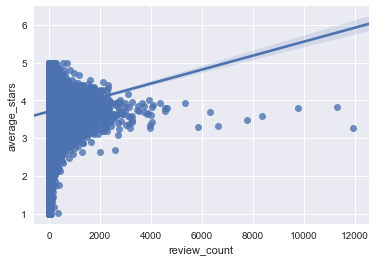

In [33]:
sns.regplot(x='review_count',y='average_stars',data=yelp_user)

In [34]:
star_count=yelp_user[['review_count','average_stars']]
star_count.head()

,review_count,average_stars
0,10,3.70
1,1,2.00
2,6,4.67
3,3,4.67
4,11,3.45


In [35]:
star_count_grouped=star_count.groupby(["review_count"]).mean()
star_count_grouped.head()

,average_stars
review_count,
0,3.865896
1,3.577236
2,3.681532
3,3.706930
4,3.721969


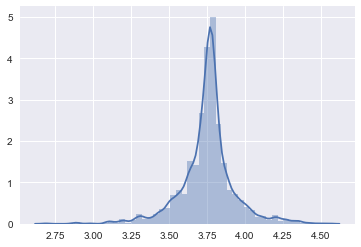

In [36]:
sns.distplot(star_count_grouped)

In [38]:
mu=star_count_grouped["average_stars"].mean()
sig=star_count_grouped["average_stars"].std()
mu

3.75348532682819

### MCMC Sampling

#### Estimating the normal distribution of review_count- average_stars model

Progress: [##############################] 10000 of 10000 samples


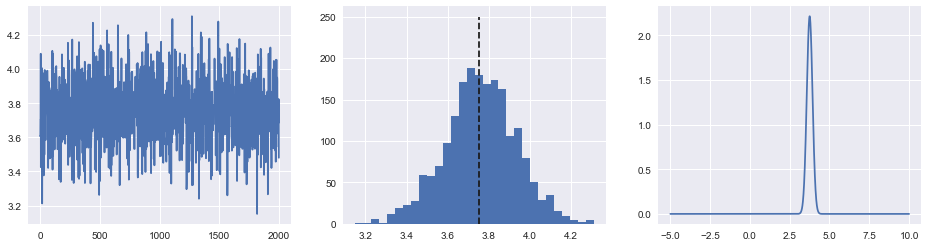

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import sampyl as smp
from sampyl import np
import math

# Autograd throws some warnings that are useful, but this is
# a demonstration, let's squelch them
import warnings
warnings.filterwarnings('ignore')

mu, sig = mu, sig
def logp(x):
    return  -np.log(sig) - (x - mu)**2/(2*sig**2)

def gaussian(x):
    return (1. / (sig * math.sqrt(2 * math.pi))) * math.exp((-(x - mu)**2)/(2 * sig**2))

start = smp.find_MAP(logp, {'x':1.})
metro = smp.Metropolis(logp, start)
chain = metro(10000, burn=2000, thin=4)

xs = np.linspace(-5, 10, num=2000)
normald = [gaussian(x) for x in xs]

fig, axes = plt.subplots(figsize=(16,4),ncols=3)
for i, ax in enumerate(axes):
    if (i == 0):
        ax.plot(chain.x)
    elif (i == 1):
        ax.hist(chain.x, bins=30)
        ax.vlines(mu, 0, 250, linestyles='--')
    else:
        ax.plot(xs, normald)

### Estimating a model based on the data with histogram expected to match normal distribution

Progress: [##############################] 10000 of 10000 samples
exact values:
3.75348532682819 0.18031278127365452
estimated values:
3.7610560688615595 0.18187124252074136


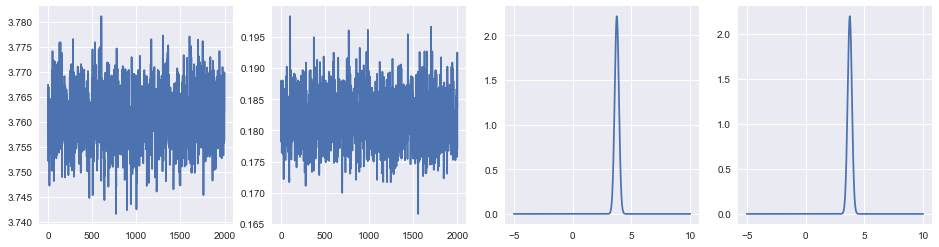

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import sampyl as smp
from sampyl import np
import math

# Autograd throws some warnings that are useful, but this is
# a demonstration, let's squelch them
import warnings
warnings.filterwarnings('ignore')

mu_r, sig_r = mu,sig
data = np.random.normal(mu_r, sig_r, 1000)

def gaussian(x, m, s):
    return (1. / (s * math.sqrt(2 * math.pi))) * math.exp((-(x - m)**2)/(2 * s**2))

# Define the log-P function here
def logp(mu_p, sig_p):
    model = smp.Model()
    
    # Normal log-likelihood
    model.add(smp.normal(data, mu=mu_p, sig=sig_p))

    # Exponential log-priors for parameters
    model.add(smp.exponential(mu_p), smp.exponential(sig_p))
    
    return model()

start = smp.find_MAP(logp, {'mu_p':1., 'sig_p':1.})
metro = smp.Metropolis(logp, start)
chain = metro(10000, burn=2000, thin=4)
print('exact values:')
print(mu_r, sig_r)
print('estimated values:')
print(chain.mu_p.mean(), chain.sig_p.mean())

xs = np.linspace(-5, 10, num=2000)
exact = [gaussian(x, mu_r, sig_r) for x in xs]
estimated = [gaussian(x, chain.mu_p.mean(), chain.sig_p.mean()) for x in xs]

fig, axes = plt.subplots(figsize=(16,4),ncols=4)
for i, ax in enumerate(axes):
    if (i == 0):
        ax.plot(chain.mu_p)
    elif (i == 1):
        ax.plot(chain.sig_p)
    elif (i == 2):
        ax.plot(xs, exact)
    elif (i -- 3):
        ax.plot(xs, estimated)


## Yelp Star rating prediction

In [52]:
review_business = yelp_review.groupby(by='business_id')

review_businessid = pd.DataFrame()
review_businessid['NumberOfReviews'] = review_business['stars'].count()

In [90]:
checkin_bus = yelp_checkin.groupby(by='business_id')

checkin_busid = pd.DataFrame()
checkin_busid['TotalCheckins'] = checkin_bus['checkins'].sum()

checkin_busid.reset_index(inplace=True)
review_businessid.reset_index(inplace=True)


review_businessid = pd.merge(left=review_businessid,right=checkin_busid,on='business_id', how='left')


In [56]:
yelp_business_new = pd.merge(left=yelp_business,right=review_businessid,on='business_id',how='left')

In [57]:
yelp_business_new.head(3)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,Mean,Median,NumberOfReviews,TotalCheckins
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,3.956522,5.0,23,39.0
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,2.909091,2.0,11,15.0
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...,1.666667,1.0,18,6.0


In [60]:
Checkins_pred= yelp_business_new[['stars','city','review_count','Mean','Median','NumberOfReviews','TotalCheckins']]


In [61]:
Checkins_pred.head(3)

,stars,city,review_count,Mean,Median,NumberOfReviews,TotalCheckins
0,4.0,Ahwatukee,22,3.956522,5.0,23,39.0
1,3.0,McMurray,11,2.909091,2.0,11,15.0
2,1.5,Phoenix,18,1.666667,1.0,18,6.0


In [62]:
Checkins_pred.shape

(174567, 7)

In [66]:
Checkins=Checkins_pred.dropna()

In [67]:
Checkins.shape

(146349, 7)

In [83]:
cols1 = ['TotalCheckins','review_count','NumberOfReviews'
 
        ]
X = Checkins[cols1]
y = Checkins['stars'].astype('int')

X.fillna(0.0,inplace=True)

In [84]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [85]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np


In [86]:
lm2 = LinearRegression()

# Fit Model
lm2.fit(train_X, train_y)

# Predict
lm2_pred = lm2.predict(test_X)

# RMSE
print(np.sqrt(metrics.mean_squared_error(test_y, lm2_pred)))

0.9968292048574879


In [87]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients: \n', lm2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, lm2_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, lm2_pred))


Coefficients: 
 [-4.38824268e-05  1.62262826e-02 -1.57331661e-02]
Mean squared error: 0.99
Variance score: 0.00


In [88]:
from sklearn.svm import LinearSVC
 
# initialise the SVM classifier
classifier = LinearSVC()

classifier.fit(train_X, train_y)

svm_pred = classifier.predict(test_X)


print(np.sqrt(metrics.mean_squared_error(test_y, svm_pred))) 

1.5466698671471586


In [89]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients: \n', classifier.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, svm_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, svm_pred))


Coefficients: 
 [[-0.00298913 -0.00555813  0.00209684]
 [ 0.00914317  0.00940063  0.00544355]
 [-0.01231301  0.00552974 -0.00280085]
 [-0.00759503 -0.01644919  0.01478514]
 [-0.00717427  0.00254232 -0.00487307]]
Mean squared error: 2.39
Variance score: -1.40


## Prediction of Likes for a restaurent

In [118]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string


In [119]:
yelp_tip['likes'].nunique()

13

In [120]:
tp= yelp_tip['likes'] >0
tip = yelp_tip[tp]

In [121]:
X = tip['text']
y = tip['likes']

In [122]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [124]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [126]:
X = bow_transformer.transform(X)

In [127]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values

Shape of Sparse Matrix:  (16284, 25593)
Amount of Non-Zero occurrences:  164594


In [128]:
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
density

0.03949405342322604

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [130]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [131]:
preds = nb.predict(X_test)

In [132]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[4267  141    9    0    0    0    0    0    0]
 [ 373   10    0    0    0    0    0    0    0]
 [  53    3    0    0    0    0    0    0    0]
 [  15    1    0    0    0    0    0    0    0]
 [   8    1    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]]


             precision    recall  f1-score   support

          1       0.90      0.97      0.93      4417
          2       0.06      0.03      0.04       383
          3       0.00      0.00      0.00        56
          4       0.00      0.00      0.00        16
          5       0.00      0.00      0.00         9
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         12       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         1

avg / total       0.82      0.88 

In [133]:
from sklearn.svm import LinearSVC
 
# initialise the SVM classifier
classifier = LinearSVC()
 
# train the classifier

classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [134]:
preds_svm = classifier.predict(X_test)

In [135]:
print(confusion_matrix(y_test, preds_svm))
print('\n')
print(classification_report(y_test, preds_svm))

[[4228  187    2    0    0    0    0    0    0]
 [ 358   23    2    0    0    0    0    0    0]
 [  51    4    1    0    0    0    0    0    0]
 [  15    1    0    0    0    0    0    0    0]
 [   7    2    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]]


             precision    recall  f1-score   support

          1       0.91      0.96      0.93      4417
          2       0.11      0.06      0.08       383
          3       0.20      0.02      0.03        56
          4       0.00      0.00      0.00        16
          5       0.00      0.00      0.00         9
          6       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
         12       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         1

avg / total       0.83      0.87 

## Conclusion

## Refernces